In [1]:
import pickle
import json
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt

sns.set_context('paper')

# Fire rate / current external

In [3]:
rates, currents, CV, v_soma = {}, [], {}, {}

for batch_number in range(1,14):
    batch_number = str(batch_number).zfill(4)

    for current in range(4):
        file = f'../data3/v3_batch{batch_number}/v3_batch{batch_number}_0_{current}'
        try:
            
            with open(file +'_data.pkl', 'rb') as f:
                data = pickle.load(f)
            amp = data['simConfig']['IClamp0']['amp']
            time = data['simData']['t']
            currents.append(amp)
            v_soma[amp] = data['simData']['V_soma']['cell_0']
        except:
            print(f'Error: to try open {file}_data.pkl')
        try:
            with open(file+'_rate.json', 'rb') as f:
                rate = json.load(f)
            rates[amp] = np.mean(rate['statData'][0])
        except:
            print(f'Error: to try open {file}_rate.json')
        try:
            with open(file+'_CV.json', 'rb') as f:
                cv = json.load(f)
            CV[amp] = np.mean(cv['statData'][0])
        except:
            print(f'Error: to try open {file}_CV.json')        

: 

: 

In [ ]:
import matplotlib.pyplot as plt
from matplotlib.gridspec import GridSpec


def plot_FbyI(time, v_soma, amps, currents, rates, save=False):
    amp_rates = {}
    for c in currents:
        amp_rates[c] = rates[c]

    fig = plt.figure(layout="constrained", figsize=(8,4))
    title = 'Frequency by external current of a single neuron'
    fig.suptitle(title)
    gs = GridSpec(3, 3, figure=fig,) #height_ratios=)

    # voltage plot
    ax0 = fig.add_subplot(gs[1, 0])
    ax1 = fig.add_subplot(gs[1, 1])
    ax2 = fig.add_subplot(gs[1, 2])
    ax = [ax0,ax1,ax2]

    ax6 = fig.add_subplot(gs[2, 0])
    ax7 = fig.add_subplot(gs[2, 1])
    ax8 = fig.add_subplot(gs[2, 2])

    ax_2 = (ax6,ax7,ax8)

    color = ['green','blue','red']
    ax0.set_ylabel('Voltage (mV)')

    for i, axis in enumerate(ax):
        t_trans = 10000
        t = np.array(time[-t_trans:])
        v = np.array(v_soma[amps[i]][-t_trans:])
        sns.lineplot(x = t, y = v, color=color[i], ax=axis, linewidth=0.8)

        axis.set_ylim(-95, 70)
        axis.spines['right'].set_visible(False)
        axis.spines['top'].set_visible(False)
        axis.set_xlabel(f'{t_trans/10**4} s')
        if i == 0:
            axis.set_xlabel(f'time:{t_trans/10**4} s')
        axis.set_xticklabels(['','',''])
        axis.set_xticks([], major=True)

        axis.spines.bottom.set_bounds(t.min(), t.max())
        axis.spines.left.set_bounds(-90, 60)

    for i, axis in enumerate(ax_2):
        axis.spines['right'].set_visible(False)
        axis.spines['top'].set_visible(False)
        if i ==0:
            axis.set_ylabel('$\\frac{dV}{dt}$')           
        axis.set_xlabel('$V$')
        sns.scatterplot(y = np.diff(v_soma[amps[i]]), x = v_soma[amps[i]][1:], color=color[i], ax=axis,s=1)
        

    # # frequency/current plot
    ax5 = fig.add_subplot(gs[0, :])
    ax5.set_ylabel('Frequency (Hz)')
    ax0.set_title('Injected Current (nA)', loc='right')
    ax5.spines['right'].set_visible(False)
    ax5.spines['top'].set_visible(False)
    sns.scatterplot(x = currents, y = rates.values(), color='black', s=8, ax=ax5, marker='^')

    # extras annotations
    arrowprops = dict(facecolor='black', width=0.009 , headwidth=4)
    for i, a in enumerate(amps):
        ax5.scatter(x = [a], y=[amp_rates[a]], color=color[i], s=10)
        # if i==2:
        #     ax5.annotate('', xy=(a, amp_rates[a]), xytext=(a-0.05, 30), arrowprops=arrowprops)
        # else:
        #     ax5.annotate('', xy=(a, amp_rates[a]), xytext=(a+0.05, 30), arrowprops=arrowprops)

    fig.suptitle(title, fontsize=16)
    #format_axes(fig)

    if save:
        path_figures = '../figures/'
        fname = title.replace(' ','_')
        plt.savefig(path_figures + fname + '.png')

    plt.show()

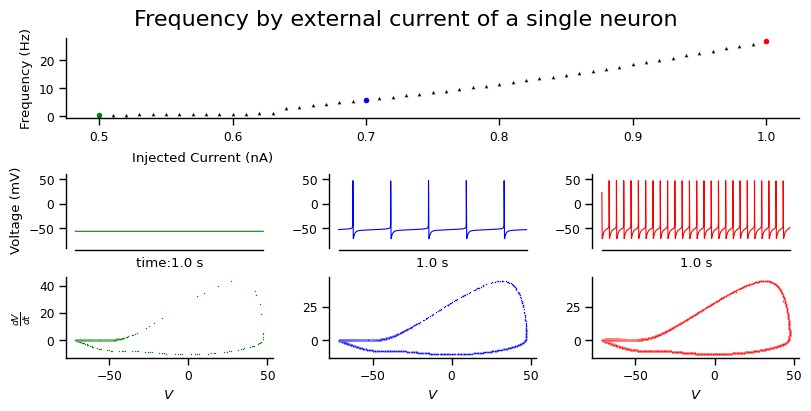

In [ ]:
plot_FbyI(time, v_soma, amps=[0.5, 0.7, 1.],currents=currents, rates=rates, save=False)

# Analyse raster plot

 Networks with differents $I_{ex}$ and fix $g_{ex} = 0.0001$



In [5]:
import pickle
import json
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
%matplotlib inline

sns.set_context('paper')

datas = {}
for batch in range(1,14):
    batch = str(batch).zfill(4)
    for current in range(4):
        try:
            with open(f'../data3/v3_batch{batch}/v3_batch{batch}_0_{current}_data.pkl', 'rb') as f:
                data = pickle.load(f)
            gex = data['simConfig']['gex']
            amp = data['simConfig']['IClamp0']['amp']
            datas[f'{amp}_{gex}'] = data
        except:
            print(f'Error: to read {batch}_{current}')
            pass

        try:
            with open(f'../data3/v3_batch{batch}/v3_batch{batch}_0_{current}_CV.json', 'rb') as f:
                data = json.load(f)
            datas[f'{amp}_{gex}']['CV'] = data
        except:
            print(f'Error: to read CV {batch}_{current}')
            pass

        try:
            with open(f'../data3/v3_batch{batch}/v3_batch{batch}_0_{current}_rate.json', 'rb') as f:
                data = json.load(f)
            datas[f'{amp}_{gex}']['rate'] = data
        except:
            print(f'Error: to read rate {batch}_{current}')
            pass

        try:
            with open(f'../data3/v3_batch{batch}/v3_batch{batch}_0_{current}_sync.json', 'rb') as f:
                data = json.load(f)
            datas[f'{amp}_{gex}']['sync'] = data
        except:
            print(f'Error: to read rate {batch}_{current}')
            pass

def get_numpy(data):
    mapa = np.zeros((100, len(data['simData']['t'])))
    for i, value in enumerate(data['simData']['V_soma'].values()):
        mapa[i] = value
    return mapa

In [19]:
def plotRaster(data, ti=550, tf=None):
    gex = data['simConfig']['gex']
    amp = data['simConfig']['IClamp0']['amp']
    popRates = data['simData']['popRates']['sPY']
    #sync = data['sync']['statData'][0][0]
    #cv_bar = np.mean(data['CV']['statData'])

    spkid = np.array(data['simData']['spkid'])
    spkt = np.array(data['simData']['spkt'])

    if tf == None:
        tf = spkt[-1]

    fig, ax = plt.subplots(1,1, figsize=(10,2))

    ax.spines['right'].set_visible(False)
    ax.spines['top'].set_visible(False)
    ax.set_ylabel('$n$-th neuron')
    ax.set_xlabel('t (ms)')

    label_gex = f'{gex}'+'S/cm²'
    parameters = r'g_{ex}' + f'={label_gex}' + '\quad' + r'i_{ex}' + f'={amp}nA'+ '\quad'+ 'PopRate'+f'={popRates:.2f}Hz'

    ax.set_title('Raster Plot \n$'+parameters+'$', pad=20)
    sns.scatterplot(y = spkid, x = spkt, s=2, color='black', ax=ax)
    plt.xlim(ti, tf)
    plt.ylim(0,100)
    plt.show()

# for amp_gex in list(datas.keys())[13::2]:
#     plotRaster(datas[amp_gex], ti=2000)


# plot potential with heatmap

In [ ]:
def plotPotentialTime(data, figsize=(10,2), ti=-4000, tf = -1):
    mapa = get_numpy(data)
    gex = data['simConfig']['gex']
    amp = data['simConfig']['IClamp0']['amp']
    t = data['simConfig']['duration']
    fig, ax = plt.subplots(figsize = figsize)
    heatmap = sns.heatmap(mapa[:,ti:], cmap='rainbow', ax=ax,
                        cbar_kws={'label': 'Membrane potential $(mV)$'})

    heatmap.set(xlim = (0,-1*ti))
    xlabels = t - heatmap.get_xticks()
    xlabels = ['{:,.2f}'.format(x) if i%2!=0 else '' for i, x in enumerate(xlabels/1000)]
    xlabels = xlabels[::-1]
    heatmap.set_xticklabels(xlabels)

    plt.xticks(rotation=30)
    label_gex = f'{gex}'+' S/cm^{2}'
    plt.title(f'Potential in time, network parameters:\n gex = ${label_gex}$ | amp = {amp} nA', pad=20, fontsize=14)
    plt.ylabel('$n$-th neuron')
    plt.xlabel('time ($s$)')
    plt.show()

In [ ]:
plotPotentialTime(datas['0.88_0.0001'])


In [ ]:
plotPotentialTime(datas['0.93_0.0001'])


In [ ]:
plotPotentialTime(datas['0.94_0.0001'])

# Plot potential

# Aplicar diagnosticos



The phase neurons $\phi_k(t)$ is: 
$$\phi_k(t) = 2 \pi m + 2 \pi \frac{t - t_{k,m}}{t_{k,m+1} - t_{k, m}}$$

where $t_{k,m}$ is the time of the $m$-th spike of the neuron $k$, $t_{k,m} < t
\le t_{k,m+1}$.

It is used to calculate the Global and Local Order parameters (GOP and LOP).

In [ ]:
times1 = np.array(datas['0.72_0.0001']['simData']['t'] )
spkid1= np.array(datas['0.72_0.0001']['simData']['spkid'])
spkt1= np.array(datas['0.72_0.0001']['simData']['spkt'])

times2 = np.array(datas['0.94_0.0001']['simData']['t'] )
spkid2 = np.array(datas['0.94_0.0001']['simData']['spkid'])
spkt2 =  np.array(datas['0.94_0.0001']['simData']['spkt'])

times3 = np.array(datas['0.99_0.0001']['simData']['t'] )
spkid3 = np.array(datas['0.99_0.0001']['simData']['spkid'])
spkt3 = np.array(datas[ '0.99_0.0001']['simData']['spkt'])

print(times1.shape, spkid1.shape, spkt1.shape)
fig, ax = plt.subplots(ncols=1, nrows=3, figsize=(10,6))

fig.set_tight_layout(20)
sns.scatterplot(y=spkid1,x = spkt1, s=1.5, ax=ax[0], color='black')
sns.scatterplot(y=spkid2,x = spkt2, s=1.5, ax=ax[1], color='black')
sns.scatterplot(y=spkid3,x = spkt3, s=1.5, ax=ax[2], color='black')

for y in np.arange(17,65,1):
    ax[1].hlines(y=y, xmin=0, xmax=1e4, color='lime', alpha=0.08)

for y in np.arange(40,100,1):
    ax[2].hlines(y=y, xmin=0, xmax=1e4, color='lime', alpha=0.08)

for axis in ax:
    axis.set_title('')
    axis.set_ylabel('n-th neuron')
    axis.spines['right'].set_visible(False)
    axis.spines['top'].set_visible(False)
    axis.set_ylim(0,100)
    axis.set_xlim(6000,9000)

ax[2].set_xlabel('t (ms)')
ax[0].set_title('$g_{ex} = 0.0001$ \t $I_{ext}= 0.72$')
ax[1].set_title('$g_{ex} = 0.0001$ \t $I_{ext}= 0.94$')
ax[2].set_title('$g_{ex} = 0.0001$ \t $I_{ext}= 0.99$')
plt.show()

In [ ]:
def phase(spkt, spkid, len_network, step_t = 1):
    """
    Calculates the phase values for spike data.

    Args:
        spkt (numpy.ndarray): Array of spike times.
        spkid (numpy.ndarray): Array of neuron IDs corresponding to spike times.
        len_network (int): Number of neurons in the network.
        step_t (int, optional): Time step for phase calculation. Defaults to 1.

    Returns:
        numpy.ndarray: Array of phase values for each neuron.
    """
    # Create a neuron matrix with m-th spikes 
    spkmat = [[spkt for spkind, spkt in zip(spkid, spkt) if spkind == neuron] for neuron in set(range(len_network))]

    # Lambda function to calculate phase
    phase = lambda t, t0, t1 : 2*np.pi*(t-t0)/(t1 - t0)

    # List comprehension to calculate phase values for each neuron
    phimat = [[phase(t,t1,t0) for (t0, t1) in zip(spk_k, spk_k[1:]) for t in np.arange(min(spk_k), max(spk_k), step_t) if t0 < t < t1] for spk_k in spkmat if len(spk_k) > 10]

    min_samples = np.min([len(phi) for phi in phimat])
    spatial_phi = np.array([phi[-min_samples:] for phi in phimat])
    return spatial_phi

In [ ]:
phimat1 = phase(spkt1, spkid1, len_network=100)
phimat2 = phase(spkt2, spkid2, len_network=100)
phimat3 = phase(spkt3, spkid3, len_network=100)

In [ ]:
phimat1.shape

In [ ]:
from matplotlib.ticker import FuncFormatter, MultipleLocator
from matplotlib import cm 
from matplotlib.colors import ListedColormap,LinearSegmentedColormap

# modified hsv in 256 color class
hsv_modified = cm.get_cmap('hsv', 256)# create new hsv colormaps in range of 0.3 (green) to 0.7 (blue)
newcmp = ListedColormap(hsv_modified(np.linspace(-0.05,1.05, 256)))# show figure

fig, ax = plt.subplots(ncols=3, nrows=1, figsize=(12,2), sharex=True, sharey=True)

# fig.set_tight_layout(20)
sns.scatterplot(y=spkid1,x = spkt1, s=3, ax=ax[0], color='black')
sns.scatterplot(y=spkid2,x = spkt2, s=3, ax=ax[1], color='black')
sns.scatterplot(y=spkid3,x = spkt3, s=3, ax=ax[2], color='black')

for axis in ax:
    axis.set_ylim(0,100)
    axis.set_xlim(4000,9000)
    axis.spines['right'].set_visible(False)
    axis.spines['top'].set_visible(False)
ax[0].set_ylabel('$n^{th}$ neuron\n')

ax[0].set_title('Rasterplot of neurons \n $I_{ex} = 0.72$ | $g_{ex} = 0.0001$')
ax[1].set_title('Rasterplot of neurons \n $I_{ex} = 0.88$ | $g_{ex} = 0.0001$')
ax[2].set_title('Rasterplot of neurons \n $I_{ex} = 0.94$ | $g_{ex} = 0.0001$')

fig, ax = plt.subplots(ncols=3, nrows=1, figsize=(12,2), sharex=True, sharey=True)
#data

sns.heatmap(phimat1, ax=ax[0], cmap=newcmp, cbar_kws={'format':FuncFormatter(lambda val,pos: '{:.0g}$\pi$'.format(val/np.pi) if val !=0 else '0')})
sns.heatmap(phimat2, ax=ax[1], cmap=newcmp, cbar_kws={'format':FuncFormatter(lambda val,pos: '{:.0g}$\pi$'.format(val/np.pi) if val !=0 else '0')})
sns.heatmap(phimat3, ax=ax[2], cmap=newcmp, cbar_kws={'label':'$\phi_{k}(t)$', 'format':FuncFormatter(lambda val,pos: '{:.0g}$\pi$'.format(val/np.pi) if val !=0 else '0')})

for axis in ax:
    axis.set_title('')
    axis.set_xlabel('t (ms)', fontsize=11)
    axis.spines['right'].set_visible(False)
    axis.spines['top'].set_visible(False)
    axis.set_xlim(4000,9000)
    
ax[0].set_ylabel('$n^{th}$ neuron\n', fontsize=11)
ax[0].set_title('Phase time of neurons \n $I_{ex} = 0.72$ | $g_{ex} = 0.0001$')
ax[1].set_title('Phase time of neurons \n $I_{ex} = 0.88$ | $g_{ex} = 0.0001$')
ax[2].set_title('Phase time of neurons \n $I_{ex} = 0.94$ | $g_{ex} = 0.0001$')

plt.show()

# Global Order Parameter (GOP)

$Z(t) = \frac{1}{N} \Big|\sum_{j}^{N} \text{exp}\big(2 \pi i \phi_j(t)\big)\Big|,$

In [ ]:
def kuramoto_param_global_order(spatial_phase):
    """
    Calculates the global order parameter of Kuramoto for a set of spatial phases.

    Args:
        spatial_phase (list): List of spatial phases.

    Returns:
        float: Value of the global order parameter of Kuramoto.

    """
    n = len(spatial_phase)
    somatorio = 0
    for j in range(0, n + 1):
        if j == n or j == 0:
            j = j % n
        somatorio += np.exp(complex(0, spatial_phase[j]))
    z = np.abs(somatorio) / n
    return z



def param_global_order(spkt, spkid, len_network, step_t = 1):
    """
    Calculates the Kuramoto global parameter order of spatial phase.

    Args:
        spkt (numpy.ndarray): Array of spike times.
        spkid (numpy.ndarray): Array of neuron IDs corresponding to spike times.
        len_network (int): Number of neurons in the network.
        n_neighbours (int): Number of neighboring neurons to consider for Kuramoto parameter order.
        step_t (int, optional): Time step for phase calculation. Defaults to 1.

    Returns:
        tuple: A tuple containing the spatial phase array and Kuramoto parameter order array.
    """
     
    # neuron matrix with m-th spikes 
    spkmat = [[spkt for spkind, spkt in zip(spkid, spkt) if spkind == neuron] for neuron in set(range(len_network))]

    # lambda function to calculate phase
    phase = lambda t, t0, t1 : 2*np.pi*(t-t0)/(t1 - t0)

    # list comprehension 
    phimat = [[phase(t,t1,t0) for (t0, t1) in zip(spk_k, spk_k[1:]) for t in np.arange(min(spk_k), max(spk_k), step_t) if t0 < t < t1] for spk_k in spkmat]

    # param global order
    min_samples = np.min([len(phi) for phi in phimat])
    spatial_phi = np.array([phi[-min_samples:] for phi in phimat])
    z = np.array([kuramoto_param_global_order(phi) for phi in spatial_phi.T])

    return spatial_phi, z
    

In [ ]:
phimat1, pgo1 = param_global_order(spkt1, spkid1, len_network=100)
phimat2, pgo2 = param_global_order(spkt2, spkid2, len_network=100)
phimat3, pgo3 = param_global_order(spkt3, spkid3, len_network=100)

In [ ]:
from matplotlib.ticker import FuncFormatter, MultipleLocator
fig, ax = plt.subplots(ncols=3, nrows=1, figsize=(12,3), sharex=True, sharey=True)

fig.suptitle('Phase time of neurons')
sns.heatmap(phimat1,cmap=newcmp, ax=ax[0],cbar_kws={'format':FuncFormatter(lambda val,pos: '{:.1f}$\pi$'.format(val/np.pi) if val !=0 else '0')})
sns.heatmap(phimat2,cmap=newcmp, ax=ax[1],cbar_kws={'format':FuncFormatter(lambda val,pos: '{:.1f}$\pi$'.format(val/np.pi) if val !=0 else '0')})
sns.heatmap(phimat3,cmap=newcmp, ax=ax[2],cbar_kws={'label':'$\phi(t)$', 'format':FuncFormatter(lambda val,pos: '{:.1f}$\pi$'.format(val/np.pi) if val !=0 else '0')})


for axis in ax:
    axis.set_title('')
    axis.set_xlabel('t (ms)', fontsize=11)
    axis.spines['right'].set_visible(False)
    axis.spines['top'].set_visible(False)
    # axis.get_yaxis().set_visible(False)
    # axis.yaxis.set_major_formatter(FuncFormatter(lambda val,pos: '{:.0g}$\pi$'.format(val/np.pi) if val !=0 else '0'))
    # axis.yaxis.set_major_locator(MultipleLocator(base=np.pi))
    axis.set_xlim(8000,9000)
ax[0].set_ylabel('$n^{th}$ neuron')


fig, ax = plt.subplots(ncols=3, nrows=1, figsize=(12,2), sharex=True, sharey=True)
fig.tight_layout(pad=25)
#data
sns.lineplot(pgo1, ax=ax[0], color='red', linestyle='dashed',linewidth=0.7)
sns.lineplot(pgo2, ax=ax[1], color='blue', linestyle='dotted',linewidth=0.7)
sns.lineplot(pgo3, ax=ax[2], color='red', linestyle='dashed',linewidth=0.7)


for axis in ax:
    axis.set_title('')
    axis.set_xlabel('t (ms)', fontsize=11)
    axis.set_ylabel('$Z(t)$ \t \t', rotation=0)
    axis.spines['right'].set_visible(False)
    axis.spines['top'].set_visible(False)
    axis.set_ylim(-0.05,1.05)
    axis.set_xlim(8000,9000)

fig.suptitle('Param Global Order')

## Local Order Parameter (LOP)

$$Z_j (t) = \Big|\frac{1}{2\delta} \sum_{j-k \le \delta}^{j+k} \text{exp}[i \phi_{k}(t)]\Big|,$$

such that $\delta$ is the number of neighbors in one direction and $0\le k <0.5$





In [ ]:
def kuramoto_param_local_order(spatial_phase, k):
    """
    Calculates the Kuramoto parameter order for a given spatial phase distribution.

    Args:
        spatial_phase (numpy.ndarray): Array representing the spatial phase distribution of neurons.
        k (int): Number of neighboring neurons to consider.

    Returns:
        numpy.ndarray: Array of Kuramoto parameter order values for each neuron.
    """
    n = len(spatial_phase)
    P = int(k/2)  # neurons in one direction
    z = np.zeros_like(spatial_phase)

    for i in range(n):
        somatorio = 0
        for k in range(i - P, i + P + 1):
            if k == 0 or k == n:
                j = n
            else:
                j = k % n
            if j >= n:
                j = j % n
            somatorio += np.abs(np.exp(complex(0, spatial_phase[j])))
        z[i] = somatorio / (int(2*P)+1)
    return z


def param_local_order(spkt, spkid, len_network, k, step_t = 1):
    """
    Calculates the spatial phase and Kuramoto parameter order for a given spike data.

    Args:
        spkt (numpy.ndarray): Array of spike times.
        spkid (numpy.ndarray): Array of neuron IDs corresponding to spike times.
        len_network (int): Number of neurons in the network.
        k (int): Number of neighboring neurons to consider for Kuramoto parameter order.
        step_t (int, optional): Time step for phase calculation. Defaults to 1.

    Returns:
        tuple: A tuple containing the spatial phase array and Kuramoto parameter order array.
    """
     
    # neuron matrix with m-th spikes 
    spkmat = [[spkt for spkind, spkt in zip(spkid, spkt) if spkind == neuron] for neuron in set(range(len_network))]

    # lambda function to calculate phase
    phase = lambda t, t0, t1 : 2*np.pi*(t-t0)/(t1 - t0)

    # list comprehension 
    phimat = [[phase(t,t1,t0) for (t0, t1) in zip(spk_k, spk_k[1:]) for t in np.arange(min(spk_k), max(spk_k), step_t) if t0 < t < t1] for spk_k in spkmat]

    # param order
    min_samples = np.min([len(phi) for phi in phimat])
    spatial_phi = np.array([phi[-min_samples:] for phi in phimat])
    z = np.array([kuramoto_param_local_order(phi, k=k) for phi in spatial_phi])

    return spatial_phi, z

In [ ]:
phimat2, lop = param_local_order(spkt2, spkid2, len_network=100, k=20)



In [ ]:
phimat2.shape

In [ ]:
# modified hsv in 256 color class
hsv_modified = cm.get_cmap('seismic', 256)# create new hsv colormaps in range of 0.3 (green) to 0.7 (blue)
newcmp = ListedColormap(hsv_modified(np.linspace(-0.05,1.1, 256)))# show figure

i = np.arange(lop.shape[0])
t = np.arange(lop.shape[1])

xdata = phimat2#lop

prd=4
tg, ig = np.meshgrid(t, i)


In [ ]:
fig, ax = plt.subplots(ncols=1, nrows=1,)
hm = ax.pcolor(ig[:, ::prd], tg[:, ::prd], xdata[:, ::prd], cmap=newcmp, shading='auto')
cbar = plt.colorbar(hm, ax=ax, label='$x_i$')
ax.set_ylabel('$t$')

In [ ]:
olaola

In [ ]:
lops = {}
for k in range(30,80):
    _, lop = param_local_order(spkt2, spkid2, len_network=100, k=k)
    lops[k] = lop

    plt.figure()
    plt.title(f'k = {k}')
    sns.heatmap(lop)
    plt.show()

In [ ]:
print(ola)

In [ ]:
from matplotlib.ticker import FuncFormatter, MultipleLocator
fig, ax = plt.subplots(ncols=3, nrows=1, figsize=(12,2), sharex=True, sharey=True)


fig.suptitle('Phase time of neurons')
sns.heatmap(phimat1,cmap='hsv', ax=ax[0],cbar_kws={'format':FuncFormatter(lambda val,pos: '{:.0g}$\pi$'.format(val/np.pi) if val !=0 else '0')})
sns.heatmap(phimat2,cmap='hsv', ax=ax[1],cbar_kws={'format':FuncFormatter(lambda val,pos: '{:.0g}$\pi$'.format(val/np.pi) if val !=0 else '0')})
sns.heatmap(phimat3,cmap='hsv', ax=ax[2],cbar_kws={'label':'$\phi(t)$', 'format':FuncFormatter(lambda val,pos: '{:.0g}$\pi$'.format(val/np.pi) if val != 0 else '0')})


for axis in ax:
    axis.set_title('')
    axis.set_xlabel('t (ms)', fontsize=11)
    axis.spines['right'].set_visible(False)
    axis.spines['top'].set_visible(False)
    # axis.get_yaxis().set_visible(False)
    # axis.yaxis.set_major_formatter(FuncFormatter(lambda val,pos: '{:.0g}$\pi$'.format(val/np.pi) if val !=0 else '0'))
    # axis.yaxis.set_major_locator(MultipleLocator(base=np.pi))
    axis.set_xlim(7000,9000)
ax[0].set_ylabel('$n^{th}$ neuron')


fig, ax = plt.subplots(ncols=3, nrows=1, figsize=(12,2), sharex=True, sharey=True)
fig.tight_layout(pad=25)
#data
sns.heatmap(plo1,cmap='gnuplot2', ax=ax[0])
sns.heatmap(plo2,cmap='gnuplot2', ax=ax[1])
sns.heatmap(plo3,cmap='gnuplot2', ax=ax[2], cbar_kws={'label':'$LOP(t)$'})


for axis in ax:
    axis.set_title('')
    axis.set_xlabel('t (ms)', fontsize=11)
    axis.set_xlim(7000,9000)
ax[0].set_ylabel('$n^{th}$ neuron')


fig.suptitle('Local Order Parameter, k=30')

In [ ]:
print(oi)

In [ ]:
phimat1, plo1 = param_local_order(spkt1, spkid1, len_network=100, k=40)
phimat2, plo2 = param_local_order(spkt2, spkid2, len_network=100, k=40)
phimat3, plo3 = param_local_order(spkt3, spkid3, len_network=100, k=40)

In [ ]:
from matplotlib.ticker import FuncFormatter, MultipleLocator
fig, ax = plt.subplots(ncols=3, nrows=1, figsize=(12,3), sharex=True, sharey=True)

fig.suptitle('Phase time of neurons')
sns.heatmap(phimat1,cmap='gnuplot', ax=ax[0],cbar_kws={'format':FuncFormatter(lambda val,pos: '{:.1f}$\pi$'.format(val/np.pi) if val !=0 else '0')})
sns.heatmap(phimat2,cmap='gnuplot', ax=ax[1],cbar_kws={'format':FuncFormatter(lambda val,pos: '{:.1f}$\pi$'.format(val/np.pi) if val !=0 else '0')})
sns.heatmap(phimat3,cmap='gnuplot', ax=ax[2],cbar_kws={'label':'$\phi(t)$', 'format':FuncFormatter(lambda val,pos: '{:.1f}$\pi$'.format(val/np.pi) if val !=0 else '0')})


for axis in ax:
    axis.set_title('')
    axis.set_xlabel('t (ms)', fontsize=11)
    axis.spines['right'].set_visible(False)
    axis.spines['top'].set_visible(False)
    # axis.get_yaxis().set_visible(False)
    # axis.yaxis.set_major_formatter(FuncFormatter(lambda val,pos: '{:.0g}$\pi$'.format(val/np.pi) if val !=0 else '0'))
    # axis.yaxis.set_major_locator(MultipleLocator(base=np.pi))
    axis.set_xlim(4000,9000)
ax[0].set_ylabel('$n^{th}$ neuron')


fig, ax = plt.subplots(ncols=3, nrows=1, figsize=(12,2), sharex=True, sharey=True)
fig.tight_layout(pad=25)
#data
sns.heatmap(plo1,cmap='gnuplot2', ax=ax[0],vmin=0, vmax=1)
sns.heatmap(plo2,cmap='gnuplot2', ax=ax[1],vmin=0, vmax=1)
sns.heatmap(plo3,cmap='gnuplot2', ax=ax[2],vmin=0, vmax=1, cbar_kws={'label':'$LOP(t)$'})


for axis in ax:
    axis.set_title('')
    axis.set_xlabel('t (ms)', fontsize=11)
    axis.set_xlim(4000,9000)
ax[0].set_ylabel('$n^{th}$ neuron')


fig.suptitle('Local Order Parameter, k=40')

In [ ]:
phimat1, plo1 = param_local_order(spkt1, spkid1, len_network=100, k=60)
phimat2, plo2 = param_local_order(spkt2, spkid2, len_network=100, k=60)
phimat3, plo3 = param_local_order(spkt3, spkid3, len_network=100, k=60)

In [ ]:
from matplotlib.ticker import FuncFormatter, MultipleLocator
fig, ax = plt.subplots(ncols=3, nrows=1, figsize=(12,3), sharex=True, sharey=True)

fig.suptitle('Phase time of neurons')
sns.heatmap(phimat1,cmap='gnuplot', ax=ax[0],cbar_kws={'format':FuncFormatter(lambda val,pos: '{:.1f}$\pi$'.format(val/np.pi) if val !=0 else '0')})
sns.heatmap(phimat2,cmap='gnuplot', ax=ax[1],cbar_kws={'format':FuncFormatter(lambda val,pos: '{:.1f}$\pi$'.format(val/np.pi) if val !=0 else '0')})
sns.heatmap(phimat3,cmap='gnuplot', ax=ax[2],cbar_kws={'label':'$\phi(t)$', 'format':FuncFormatter(lambda val,pos: '{:.1f}$\pi$'.format(val/np.pi) if val !=0 else '0')})


for axis in ax:
    axis.set_title('')
    axis.set_xlabel('t (ms)', fontsize=11)
    axis.spines['right'].set_visible(False)
    axis.spines['top'].set_visible(False)
    # axis.get_yaxis().set_visible(False)
    # axis.yaxis.set_major_formatter(FuncFormatter(lambda val,pos: '{:.0g}$\pi$'.format(val/np.pi) if val !=0 else '0'))
    # axis.yaxis.set_major_locator(MultipleLocator(base=np.pi))
    axis.set_xlim(4000,9000)
ax[0].set_ylabel('$n^{th}$ neuron')


fig, ax = plt.subplots(ncols=3, nrows=1, figsize=(12,2), sharex=True, sharey=True)
fig.tight_layout(pad=25)
#data
sns.heatmap(plo1,cmap='gnuplot2', ax=ax[0],vmin=0, vmax=1)
sns.heatmap(plo2,cmap='gnuplot2', ax=ax[1],vmin=0, vmax=1)
sns.heatmap(plo3,cmap='gnuplot2', ax=ax[2],vmin=0, vmax=1, cbar_kws={'label':'$LOP(t)$'})


for axis in ax:
    axis.set_title('')
    axis.set_xlabel('t (ms)', fontsize=11)
    axis.set_xlim(4000,9000)
ax[0].set_ylabel('$n^{th}$ neuron')


fig.suptitle('Local Order Parameter, k=60')

# Recurrence Analysis of CV

In [ ]:
statData = []

spkinds = datas['0.75_0.0001']['simData']['spkid']
spkts = datas['0.75_0.0001']['simData']['spkt']

spkmat = [[spkt for spkind, spkt in zip(spkinds, spkts) if spkind == gid] for gid in set(range(100))]
isimat = [[t - s for s, t in zip(spks, spks[1:])] for spks in spkmat if len(spks) > 10]
# interspike interval
isicv = [np.std(x) / np.mean(x) if len(x) > 0 else 0 for x in isimat]  # if len(x)>0]
statData.append(isicv)

In [ ]:
isicv = np.array(isicv)
isicv

In [ ]:
from pyunicorn.timeseries import RecurrencePlot

#  Settings for the embedding
DIM = 1  # Embedding dimension
TAU = 0  # Embedding delay

# Distance metric in phase space ->
# Possible choices ("manhattan","euclidean","supremum")
METRIC = 'euclidean'

EPS = 0.01  # Fixed recurrence threshold

rp_4 = RecurrencePlot(isicv, dim=DIM, tau=TAU, metric=METRIC,
                    normalize=False, threshold=EPS)

fig, ax = plt.subplots(ncols=1, nrows=1, figsize=(6,3), sharex=True, sharey=True)

ax.matshow(rp_4.recurrence_matrix(), cmap='binary', aspect='auto')

ax.set_xlabel(r'$CV_i$')
ax.set_ylabel(r'$CV_j$')
plt.show()

# Analysis data3

In [ ]:
import pickle
import json

def get_infos_batch(path_data:str, version:int, bactch_number:int, sub_batch_number:int, verbose=False):
    """
    Retrieves various information from pickle and JSON files based on the provided version, batch number, and sub-batch number.

    Args:
        path_data (str): Path of folder that contains the data.
        version (int): The version number.
        bactch_number (int): The batch number.
        sub_batch_number (int): The sub-batch number.

    Returns:
        dict: A dictionary containing the following information:
            - 'path_file' (str): The path of the data file.
            - 'gex' (float): Value obtained from the 'simConfig' dictionary in the pickle file.
            - 'amp' (float): Value obtained from the 'IClamp0' dictionary in the pickle file.
            - 'cv' (dict): Data obtained from the 'statData' dictionary in the CV JSON file.
            - 'rate' (dict): Data obtained from the 'statData' dictionary in the rate JSON file.
            - 'sync' (dict): Data obtained from the 'statData' dictionary in the sync JSON file.

    Raises:
        Exception: If an error occurs while opening any of the required files.

    """
    bactch_number = str(bactch_number).zfill(4)
    path_files = f'../{path_data}/v{version}_batch{bactch_number}/v{version}_batch{bactch_number}_0_{sub_batch_number}'

    infos = {}
    infos['path_file'] = path_files
    try:
        with open(path_files+'_data.pkl', 'rb') as f:
            data = pickle.load(f)
            gex = data['simConfig']['gex']
            amp = data['simConfig']['IClamp0']['amp']

            infos['gex'] = gex
            infos['amp'] = amp
    except:
        if verbose: print('Error to open: ' + path_files + '_data.pkl')
        return None
    
    try:
        with open(path_files+'_CV.json', 'rb') as f:
            data = json.load(f)
            cv = data['statData']
            infos['cv'] = cv
    except:
        if verbose: print('Error to open: ' + path_files + '_CV.json')
        return None
        
    try:
        with open(path_files+'_rate.json', 'rb') as f:
            data = json.load(f)
            rate = data['statData']
            infos['rate'] = rate
    except:
        if verbose: print('Error to open: ' + path_files + '_rate.json')
        return None
    
    try:
        with open(path_files+'_sync.json', 'rb') as f:
            data = json.load(f)
            sync = data['statData']
            infos['sync'] = sync
    except:
        if verbose: print('Error to open: ' + path_files + '_sync.json')
        return None
    
    return infos   

def load_batch_data(path_data: str, version: int, batch: int, sub_batch: int) -> dict:
    """
    Loads batch data from a pickle file based on the provided path, version, batch number, and sub-batch number.

    Args:
        path_data (str): The path to the data folder.
        version (int): The version number.
        batch (int): The batch number.
        sub_batch (int): The sub-batch number.

    Returns:
        dict: The loaded data from the pickle file.

    Raises:
        Exception: If an error occurs while reading the pickle file.

    """
    batch_number = str(batch).zfill(4)
    path_files = f'../{path_data}/v{version}_batch{batch_number}/v{version}_batch{batch_number}_0_{sub_batch}'

    try:
        with open(path_files + '_data.pkl', 'rb') as f:
            data = pickle.load(f)
            return data
    except:
        raise Exception(f'Error reading: {path_files}')


In [ ]:
batches = {}
for batch in range(1,69):
    for sub_batch in range(5):
        infos = get_infos_batch('data3', 3,batch,sub_batch)
        if infos!= None: batches[f'{batch}_{sub_batch}'] = infos    

In [ ]:
batches.keys()

In [ ]:
batch_1_1 = load_batch_data('data3', 3, 1, 1)
batch_2_1 = load_batch_data('data3', 3, 2, 1)
batch_4_1 = load_batch_data('data3', 3, 4, 1)
plotRaster(batch_1_1, ti=5000)
plotRaster(batch_2_1, ti=5000)
plotRaster(batch_4_1, ti=5000)
#plotPotential(batch_10_1, ti = -10000, tf = -1, cell=50)

In [ ]:
batchs = [batch_1_1, batch_2_1, batch_4_1]

fig, ax = plt.subplots(ncols=1,nrows=3, figsize=(12,8))
title = 'Raster plot of HH non-local networks with diferent external currents'
fig.suptitle(title)
fig.tight_layout(pad=5)
ti, tf = 5000, None

for i, batch in enumerate(batchs):
    gex = batch['simConfig']['gex']
    amp = batch['simConfig']['IClamp0']['amp']
    popRates = batch['simData']['popRates']['sPY']

    spkid = np.array(batch['simData']['spkid'])
    spkt = np.array(batch['simData']['spkt'])

    tf = spkt[-1]

    ax[i].spines['right'].set_visible(False)
    ax[i].spines['top'].set_visible(False)

    ax[i].set_title('$'+parameters+'$', pad=20, loc='left')
    ax[i].set_ylabel('$n$-th neuron')
    if i==2: ax[i].set_xlabel('t (ms)')

    label_gex = f'{gex}'+'S/cm²'
    parameters = r'g_{ex}' + f'={label_gex}' + '\quad' + r'i_{ex}' + f'={amp}nA'+ '\quad'+ 'PopRate'+f'={popRates:.2f}Hz'

    sns.scatterplot(y = spkid, x = spkt, s=0.9, color='black', ax=ax[i])
    ax[i].set_xlim(ti, tf)
    ax[i].set_ylim(0,100)
#plt.savefig('../figures/'+title.replace(' ','_')+'.eps')
#plt.savefig('../figures/'+title.replace(' ','_')+'.png')
plt.show()


In [ ]:
from pyunicorn.timeseries import RecurrencePlot

def get_rp(array, eps = 0.01): 
    array = np.array(array)   
    #  Settings for the embedding
    DIM = 1  # Embedding dimension
    TAU = 0  # Embedding delay

    # Distance metric in phase space ->
    # Possible choices ("manhattan","euclidean","supremum")
    METRIC = 'euclidean'

    EPS = eps  # Fixed recurrence threshold

    rp = RecurrencePlot(array, dim=DIM, tau=TAU, metric=METRIC,
                        normalize=False, threshold=EPS)
    return rp


def get_recurrence_matrix(array, eps=0.01):
    array = get_rp(array, eps).recurrence_matrix()
    return array

In [ ]:
def plot_recurrence_matrix(array, eps=0.01):
    recmat = get_recurrence_matrix(array, eps)
    evals, evecs = np.linalg.eigh(recmat)
    fig, ax = plt.subplots(ncols=1, nrows=1, figsize=(6,4))
    sns.heatmap(recmat, cmap = 'binary', ax=ax[0])
    plt.show()


In [ ]:
mbrn_pot_11 = get_numpy(batch_1_1)
mbrn_pot_21 = get_numpy(batch_2_1)
mbrn_pot_41 = get_numpy(batch_4_1)

In [ ]:
plotPotential(batch_4_1, ti=-20, cell=50)
plotPotential(batch_4_1, ti=-20, cell=40)
plotPotential(batch_4_1, ti=-20, cell=45)